In [ ]:
from arcgis.gis import GIS
gis = GIS("home")


# Red Squirrel Stronghold Site Map for Fife

* **Authors:** Floriana Lawrence

* **Student ID:** 220016876

* **Date:** [09/12/24]

**Abstract:**
This project aims to identify where within Fife a potential red squirrel stronghold site could be developed. This project considers factors such as vegetation type, proximity to roads and water, and human disturbance. This research is important as red squirrels contribute greatly to woodland regreneration and the population is significantly declining. 

**Keywords:** Suitabilty, conservation, opportunities, stronghold sites

# GitHub Repository
- **GitHub Link:** https://github.com/220016876/IRP_FL.git

## Declaration

> In submitting this assignment, I hereby confirm that I have read the University's statement on Good Academic Practice. The following work is my own. Significant academic debts and borrowings have been properly acknowledged and referenced.

**Table of Contents:** 
* Introduction
* Methods and outcomes
  - Creating each Criteria for the MCE
  - Calcualting the Weights of the Criterias
* Final Results
  - Suitability Map
* Discussion
* Conclusion

## Introduction

This research project aims to see what areas within Fife would be suitable to develop a red squirrel stronghold site. 

Red squirrels have a  high ecological significance for Scotland. They are highly important for tree regeneration, as they bury seed to store them. They are also highly important for biodiversity as they also spread spores of fungi. This spore spreading supports tree healthy and resilient growth (SWT2023).

Additonally, red squirrels are Scotland's only native squirrel species, due to this they have high socio-economic significance for Scotland through tourism. This toruism that red squirrels support, such as wildlife watching, helps contribute to the £138 million tourism makes to the Scottish economy annually, supporting 3,943 jobs (SWT2023).

However, the red squirrel population has declined significantly, from around 3.5 million to just a few hundred thousand, classifying them as one of the most threatened mammal species in the UK. The main reasons behind this decline is the invasive non-native grey squirrel. Grey squirrels are larger and more resilient than red squirrels. When grey squirrels move into a new area, red squirrels can be completely replaced within 15 years. Additionally some grey squirrels carry Squirrelpox, a virus that does not affect grey squirrels but is fatal to red squirrels (FC2024). Additionally, the destruction of woodland, through change of land use, such as for development also contributes to the decline of red squirrels (SSRS2024).


Scotland however maintainins 75% of the delcining population. Due to this Scotland offers great opportunities for red squirrel stronghold sites, as well as help with species reintroduction elsewhere (FC2024).

There are many groups within Scotland that aim to help restore the red squirrel population, through biodiveristy surveys and supporting the protection of red squirrels through funding. Fife has its own red Squirrel regional Network Group, that aims to support the conservation of red squirrels in the area. However Fife is not considered a priority area for red squirrel conservation as there are populations of grey squirrels within Fife (SSRS2024).

However, grey squirrels can be prevented into areas through creating red squirrel stronghold sites that attract red squirrels to an certain area but not grey squirrels, this can be done through maintaing certain vegetation types that grey squirrels dislike, such as conifers (SWT2023). Due to this, this projects aims to explore if there are any areas within Fife that could become a potential red squirrel stronghold site to help with conservation efforts (SWT2023).

## Methodology
This project will explore Fifes opportunties for development of a red squirrel stronghold site. This project will do this by creating a multiple criteria evaluation (MCE) map, using QGIS tools. An MCE will allow for the consideration of multiple factors, which is highly important when looking at habitat suitability as it is often dependant on multiple factors. This project will consider factors such as proximity to water, proximity to roads, elevation and slope,  and most importantly vegetation type, as well as consider constraints such as urban areas, to highlight areas most suitable habitat for red squirrels, indicating opportunties for red squirrel stronghold sites. The data used and MCE results will be processed and visualised using Python. 

## Creating each criteria 

### Criteria 1 - Proximity to Water (Factor)

Proximity to water is a key factor, as access to water is essential for the habitats. 

To create this criteria, I used the HLMC EUNIS Level 1 data from the European Environment Agency, which indicated different land types. I first clipped the raster using the 'Clip to extent' tool, to the Fife extent using the Local Regions column to select Fife within the Country Boundries File provided by GG3209 Lab 2.


I then used the raster calculator to extract only the values that were equal to water within the attribute table. Using the expression: 'HABITAT_NA = 'water'. This created a new water only raster (see figure 1).

### Figure 1. Water Raster
#### Data source: European Environment Agency

In [138]:
dataset1 = '/arcgis/home/IRP_FINAL/WaterRaster.tif'

EPSG:27700


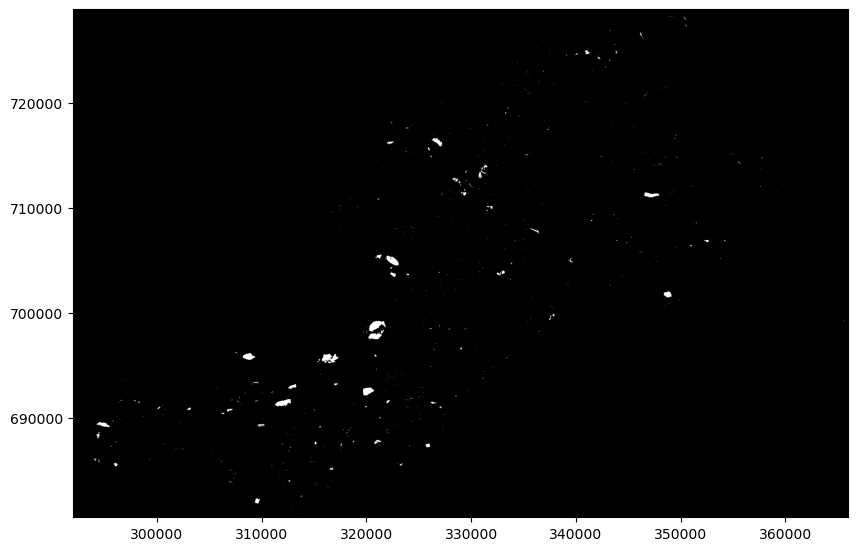

<AxesSubplot: >

In [139]:
waterr = rio.open('/arcgis/home/IRP_FINAL/WaterRaster.tif')
print(waterr.crs)
plot.show(waterr,cmap="gist_gray")

I then used the proximity tool on this new water raster, which gave me the max and min values (0,14). I then normalised the proximity raster, so the max and min values where equal to (0,1) ready to be used in the final raster calculation, resulting in the formation of Criteria 1 (figure 2). 

In [ ]:
# Normalisation Process for Criteria 1
F(0) =1
F(14)=0
Finding n
F(x)=k*x+n
K x 0 + n =1
n =1

#Finding k
F(x)=k*x+n
K x 14 + 1 = 0
14k + 1 =0
14k = -1
K = -1/14

#Final equation used in Raster Calculator
F(x)=k*x+n
=-1/14 x + 1
= - x / 14 + 1

### Figure 2. Criteria 1. Water, 
#### Data source: European Environment Agency (HLMC)

In [141]:
dataset2 = '/arcgis/home/IRP_FINAL/C1-Water.tif'

EPSG:27700


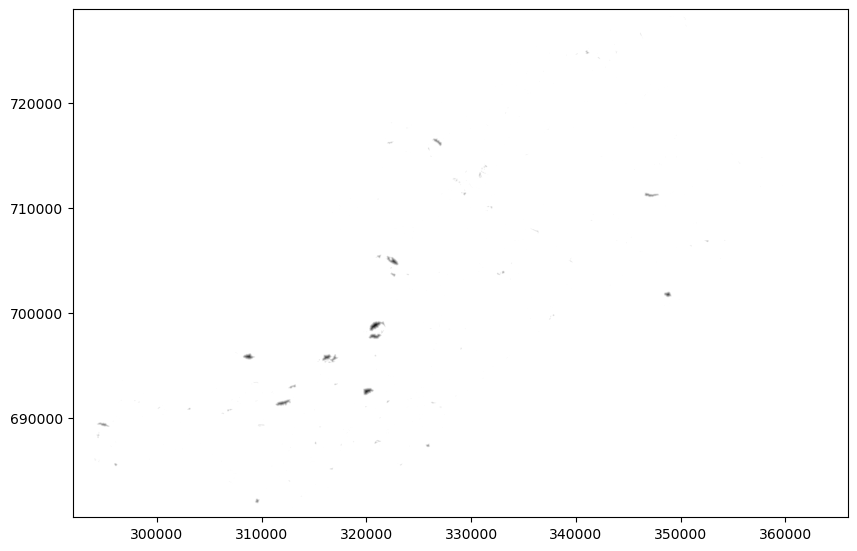

<AxesSubplot: >

In [142]:
water = rio.open('/arcgis/home/IRP_FINAL/C1-Water.tif')
print(water.crs)
plot.show(water,cmap="gist_gray")

### Criteria 2 - Proximity to Roads (Factor)

Proximity to roads is another key factor as being far away from roads is better for red squirrels as it reduces impacts of noise pollution and road side fatalities. 

To create this criteria, I used data from Environmental Information Data Centre, which contained road networks for all of UK. I selected the three road networks that covered Fife, and then merged them into one vector using the Merge tool under GDAL. I clipped the roads to the extent of Fife, using the same Fife region extent I made as previously mentioned. 

I then used the raster calculator to extract only the values that were equal to A roads within the attribute table. Using the expression: 'LCT = 'A road', creating a new A roads raster (see figure 3).  

### Figure 3. A Roads Raster 
#### Data Source: Environmental Information Data Centre

In [143]:
dataset3 = '/arcgis/home/IRP_FINAL/ARoadsRaster.tif'

EPSG:27700


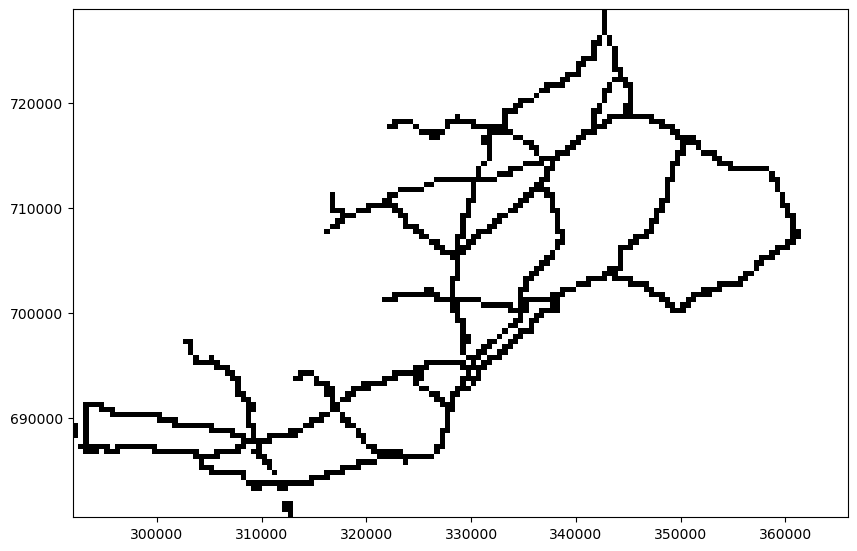

<AxesSubplot: >

In [144]:
roadsr = rio.open('/arcgis/home/IRP_FINAL/ARoadsRaster.tif')
print(roadsr.crs)
plot.show(roadsr,cmap="gist_gray")

I then used the proximity tool to get the distances from the roads, which I then had to normalise this raster, so that the range (0,29774), would translate into (0,1) creating Critera 2 (see figure 4).

In [ ]:
# Normalisation Process for Criteria 2
F(0) =1
F(29774)=0
Finding n
F(x)=k*x+n
K x 0 + n =1
n =1

#Finding k
F(x)=k*x+n
K x 29774 + 1 = 0
29774k + 1 =0
29774k = -1
K = -1/29774

#Final equation
F(x)=k*x+n
=-1/29774 x + 1
= - x / 29774 + 1

### Figure 4. Criteria 2 - Roads
#### Data Source: Environmental Information Data Centre

In [146]:
dataset4 = '/arcgis/home/IRP_FINAL/C2-Roads.tif'

EPSG:27700


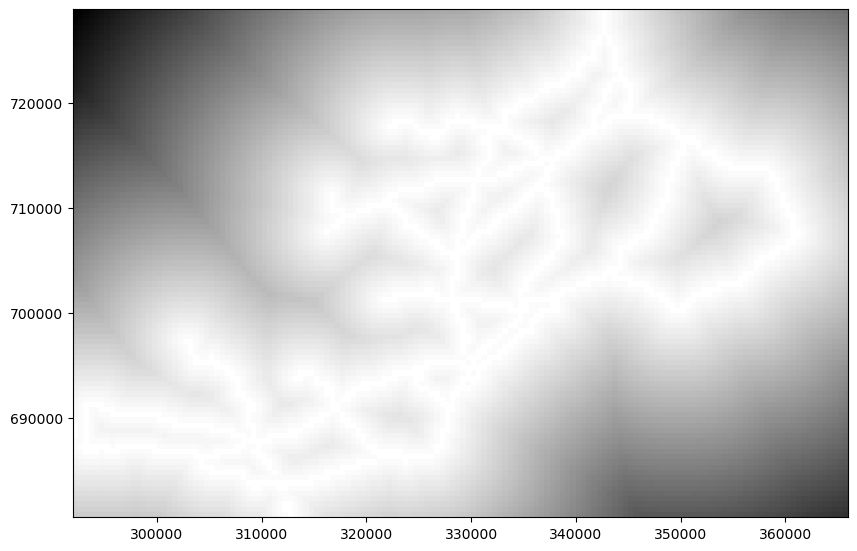

<AxesSubplot: >

In [147]:
roads = rio.open('/arcgis/home/IRP_FINAL/C2-Roads.tif')
print(roads.crs)
plot.show(roads,cmap="gist_gray")

### Criteria 3 - Elevation of Fife (Factor)

I considered elevation as a minor factor but it is still important to consider, as the management of the potential red squirrel stronghold site may be more difficult on higher elevations.

The source of this data was from a Scotland DEM provided to us from GG3209 Lab 1. I used the Local Regions column within the Country Boundries File provided by GG3209 Lab 2, and selected Fife. I then clipped the extent of the Scotland DEM to the Fife Local Region to give me the Fife DEM (see figiure 5).


### Figure 5. Fife DEM
#### Data Source: GG3209 LAB 1 

In [148]:
dataset5 ='/arcgis/home/IRP_FINAL/Fife DEM.tif'

EPSG:27700


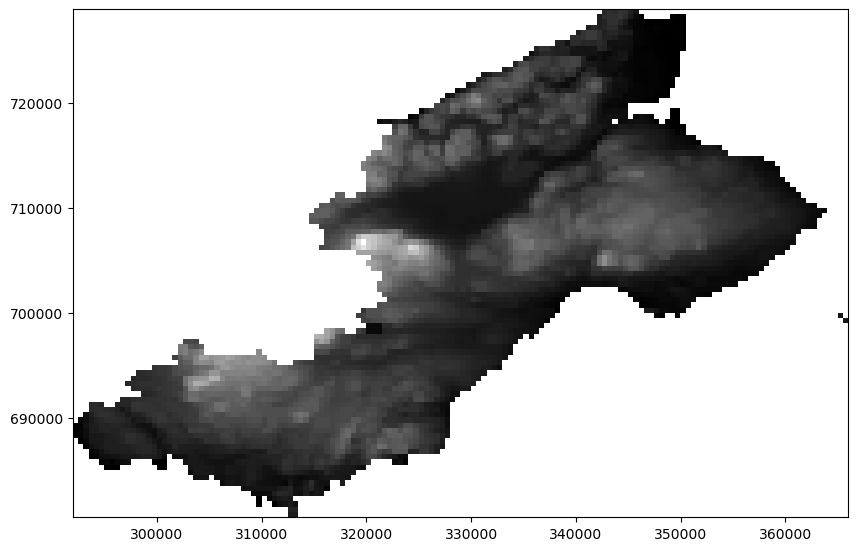

<AxesSubplot: >

In [149]:
DEM = rio.open('/arcgis/home/IRP_FINAL/Fife DEM.tif')
print(DEM.crs)
plot.show(DEM,cmap="gist_gray")

From there I normalised the raster, so that the range (0,520) would translate into (0,1) resulting in criteria 3 (see figure 6). 

In [ ]:
#Normalisation Process for Criteria 3
F(0) =1
F(520)=0
Finding n
F(x)=k*x+n
K x 0 + n =1
n =1

#Finding k
F(x)=k*x+n
K x 520 + 1 = 0
520k + 1 =0
520k = -1
K = -1/29774

#Final equation for Raster Calculator 
F(x)=k*x+n
=-1/520 x + 1
= - x / 520 + 1

### Figure 6. Criteria 3 - Elevation
#### Data Source: GG3209 LAB 1 

In [150]:
dataset6 = '/arcgis/home/IRP_FINAL/C3-Elevation.tif'

EPSG:27700


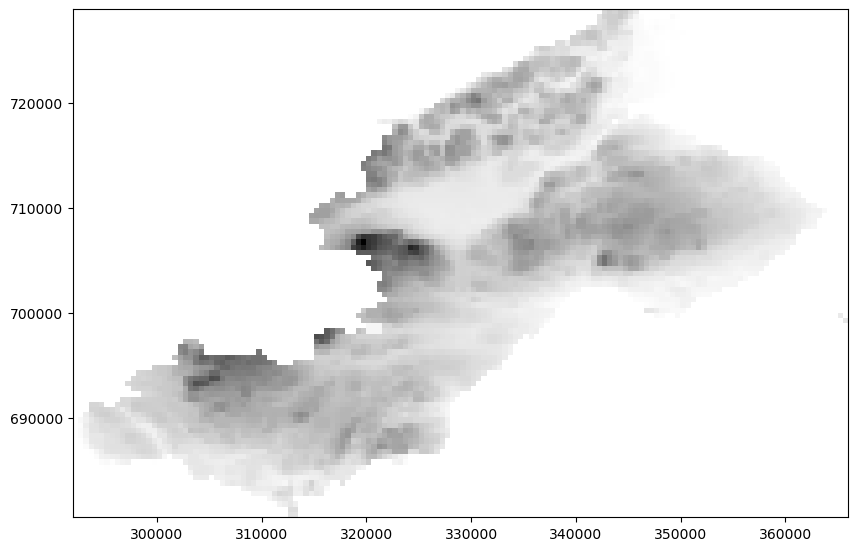

<AxesSubplot: >

In [156]:
elev= rio.open('/arcgis/home/IRP_FINAL/C3-Elevation.tif')
print(elev.crs)
plot.show(elev,cmap="gist_gray")

### Criteria 4 - Slope of Fife (Factor)

Slope is a relatively minor factor, however lands of shallow slope are preferred since they are more accesible for management purposes. 

To find the slope, I used the Fife DEM, created from the Scotland DEM as before, and ran the Slope tool under Raster Analysis in GDAL, resulting in figure 7.


### Figure 7. Fife Slope
#### Data Source: GG3209 LAB 1 

In [152]:
dataset7 = '/arcgis/home/IRP_FINAL/Fife_Slope.tif'

EPSG:27700


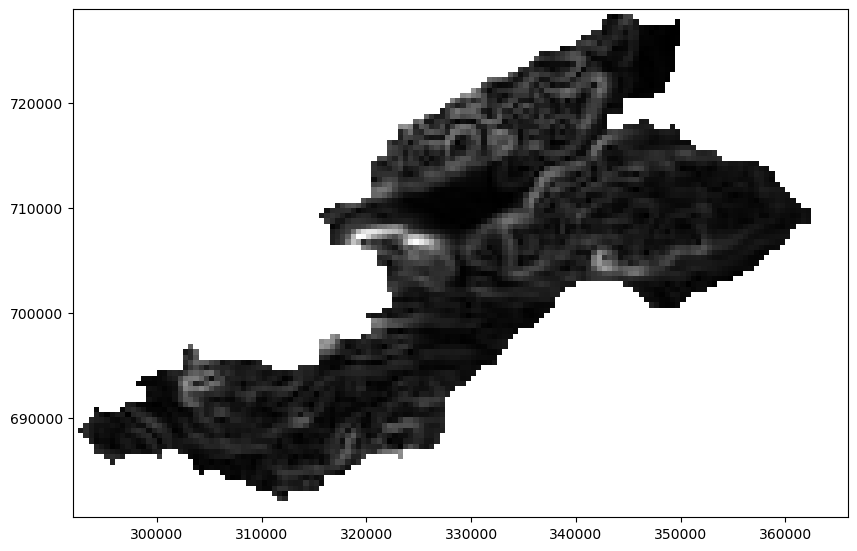

<AxesSubplot: >

In [153]:
sloper = rio.open('/arcgis/home/IRP_FINAL/Fife_Slope.tif')
print(sloper.crs)
plot.show(sloper,cmap="gist_gray")

I then normalised this so that the range (0,16) would translate into (0,1) resulting in figure 8.

In [ ]:
#Normalisation Process for Criteria 4
F(0) =1
F(16)=0
Finding n
F(x)=k*x+n
K x 0 + n =1
n =1

#Finding k
F(x)=k*x+n
K x 16 + 1 = 0
16k + 1 =0
16k = -1
K = -1/16

#Final equation for Raster Calculator 
F(x)=k*x+n
=-1/16 x + 1
= - x / 16 + 1

### Figure 8. Criteria 4 - Slope
#### Data Source: GG3209 LAB 1 

In [154]:
dataset8 = '/arcgis/home/IRP_FINAL/C4-Slope.tif'

EPSG:27700


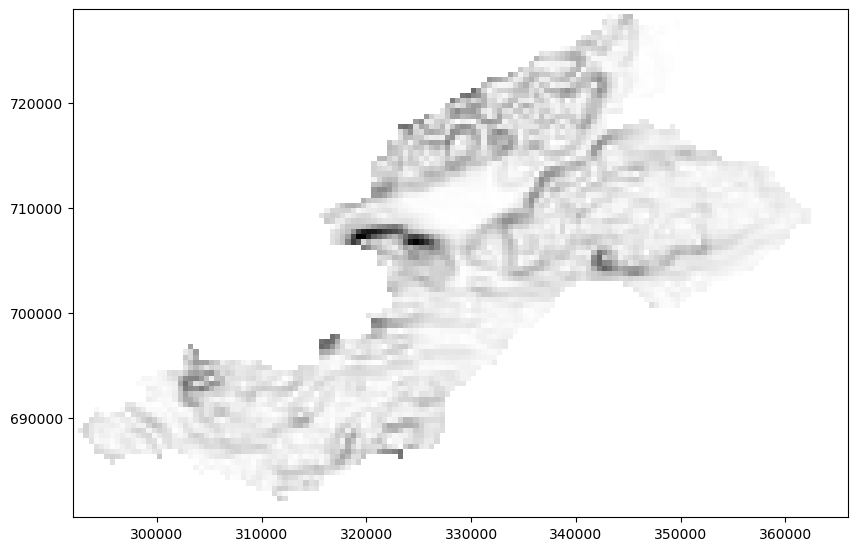

<AxesSubplot: >

In [155]:
slope = rio.open('/arcgis/home/IRP_FINAL/C4-Slope.tif')
print(slope.crs)
plot.show(slope,cmap="gist_gray")

### Criteria 5 - Urban Areas (Constaint)

I considered Urban Areas as a constraint as urban areas are not suitbale for red squirrel stronghold sites areas, due to human disturbances. 

To create this criteria, I used the HLMC data from the European Environment Agency, which indicates different land types. I first clipped the raster to Fife, using the same process as mentioned. 

I then used the raster calculator to extract only the values that were equal to urban within the attribute table. Using the expression: 'HABITAT_NA = 'urban'. The values were already (0,1), so there was no need to normalise, resulting in criteria 5 (see figure 1).

### Figure 9. Criteria 5 - Urban
#### Data Source: European Environment Agency 

In [157]:
dataset9 = '/arcgis/home/IRP_FINAL/C5-Urban.tif'

EPSG:27700


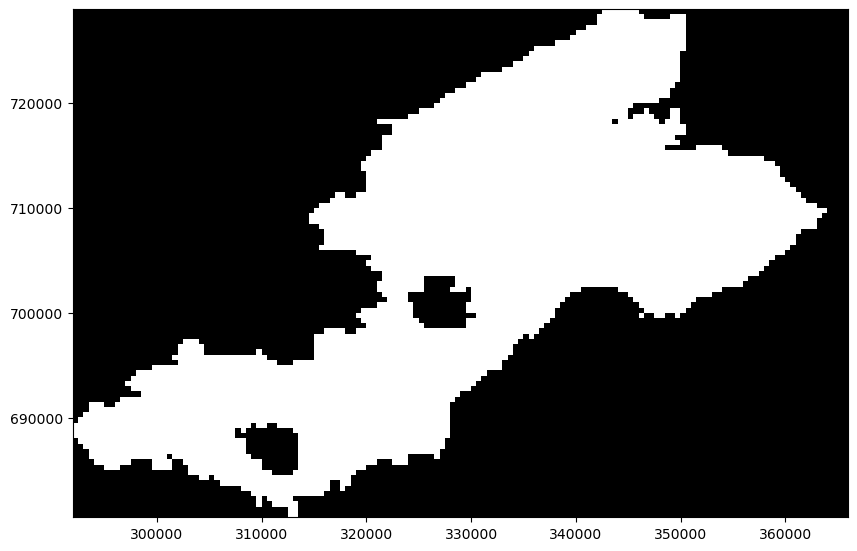

<AxesSubplot: >

In [158]:
urban = rio.open('/arcgis/home/IRP_FINAL/C5-Urban.tif')
print(urban.crs)
plot.show(urban,cmap="gist_gray")

### Criteria 6 - Ideal Vegetation Type (Factor)
Last but not least, is the most important criteria, Vegetation Type. Vegetation type is highly important in supporting red squirrel stronghold areas.

Red Squirrels are a woodland species, they prefer conifers with large seeds, such as larch and Norway spruce. They mainly feed on seeds and nuts, supplementing their diet with fruit, plant shoots and fungi when their preferred food is less available. However, conifers don’t always produce seeds every year, so it is important to consider broadleaf deciduous woodlands and heaths as well. Furthermore certain vegetation types help repevent grey squirrels from entering the area. These barriers can include coniferous trees (TWT2024).

Taking this into consideration, I used the HABMOS map data, from Scotland's Evironment Map DataHub. I first used the raster calculator to extract only the values that were equal to suitable vegetation types within the attribute table, using the expressions: 
'HABITAT_NA = 'coniferous woodland'
'HABITAT_NA = 'broadleaf deciduous woodlands'
'HABITAT_NA = 'heaths'

I then exported these selected features into new raster layers and merged them into one raster, using the merge tool under GDAL, that showed the ideal habitats for a red squirrel strong hold site (see figure 10). 

### Figure 10 . Criteria 6 - Ideal Vegetation type
#### Data Source:  Scotland's Environment Map DataHub

In [2]:
dataset10 = '/arcgis/home/IRP_FINAL/C6-Vegetation.tif'

EPSG:27700


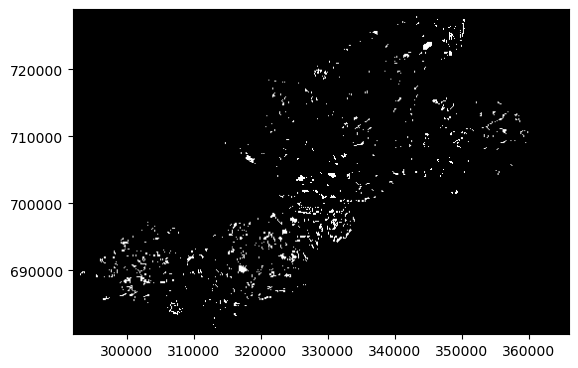

<AxesSubplot: >

In [33]:
hab = rio.open('/arcgis/home/IRP_FINAL/C6-Vegetation.tif')
print(hab.crs)
plot.show(hab,cmap="gist_gray")

### Calcuating weights 

Calculating the weights for each criteria is an extremely important process. To assign the weights for each criteria, I applied the Analytic Hierarchu Process (AHP). AHP assigns weights based on the criteras importance, using a scale that ranges from 1-9, where 1 indicates criterias of equal importance, and 9 indicates that one criteria is more important than another (Rahman01122008). 

I ranked the criterias from most important to least important, based on the mentioned research as follows:

* Vegetation type
* Proximity to water
* Proximity to roads
* Elevation 
* Slope

(Urban is a constraint and therefore has no weight)


Applying this method, based on this ranking, I first created a weights matrix (see table 1)

### Table 1. Weight comparision using AHP method

In [38]:
dataset11 = '/arcgis/home/IRP_FINAL/Weights matrix.csv'

In [39]:
weights_df = pd.read_csv('/arcgis/home/IRP_FINAL/Weights matrix.csv')
weights_df.head(6)

,Criteria,Vegegation Type,Water,Roads,Elevation,Slope
0,Vegegation Type,1,2,4,5,6
1,Water,1.0 / 2.0,1,3,5,5
2,Roads,1.0/4.0,1.0/3.0,1,3,4
3,Elevation,1.0/5.0,1.0/4.0,1.0/3.0,1,3
4,Slope,1.0/6.0,1.0/5.0,1.0/4.0,1.0/3.0,1


I then used the matrix to create an array which could then be normalised, and then averaged to give me the weights of each criteria, overall equalling to 1.

In [4]:
# Define the criteria
criteria = ["Vegetation type", "Water", "Roads", "Elevation", "Slope"]

# Create the weights matrix based on importance
# Vegetation type > Water > Roads > Elevation > Slope
Weights_matrix = np.array([
    [1, 2, 4, 5, 6],  # Vegetation type
    [1/2, 1, 3, 4, 5],  # Water
    [1/4, 1/3, 1, 3, 4],  # Roads
    [1/5, 1/4, 1/3, 1, 3],  # Elevation
    [1/6, 1/5, 1/4, 1/3, 1]  # Slope
])

# Normalise the weight matrix
normalised_matrix = Weights_matrix / Weights_matrix.sum(axis=0)

# Calculate the weights by averaging the normalised matrix
weights = normalised_matrix.mean(axis=1)

# Printing the criterias and weights
for i in range(len(criteria)):
    print(f"{criteria[i]}: {weights[i]:.4f}")

# Print the sum of weights to verify they sum up to 1
print(f"Sum of weights: {weights.sum():.4f}")


Vegetation type: 0.4316
Water: 0.2826
Roads: 0.1516
Elevation: 0.0865
Slope: 0.0477
Sum of weights: 1.0000


I then applied these weights to each of the criterias using the raster calculator, which gave the suitability map (see figure 11).

In [ ]:
# Raster Calcultor input
( 0.4  * "C6-Vegetation@1"  + 0.3  *  "C1-Water@1"  + 0.2 * "C2-Roads@1" + 0.1 * "C3-Elevation@1" + 0.05 * "C4-Slope@1" )  * "C5-Urban@1"

## Final Results

Figure 11 shows least suitable areas in red and most suitable areas in dark green. As shown Fife overall has many areas that indicate a suitable spot for a red squirrel stronghold area. The largest and most suitable areas are around Lady Bank, Tayport and Kincardine.

### Figure 11 . Red Squirrel Stronghold Site Suitability Map


In [163]:
dataset12 = '/arcgis/home/IRP_FINAL/RSsuitability.tif'

/arcgis/home/IRP_FINAL/RSsuitability.tif
EPSG:27700


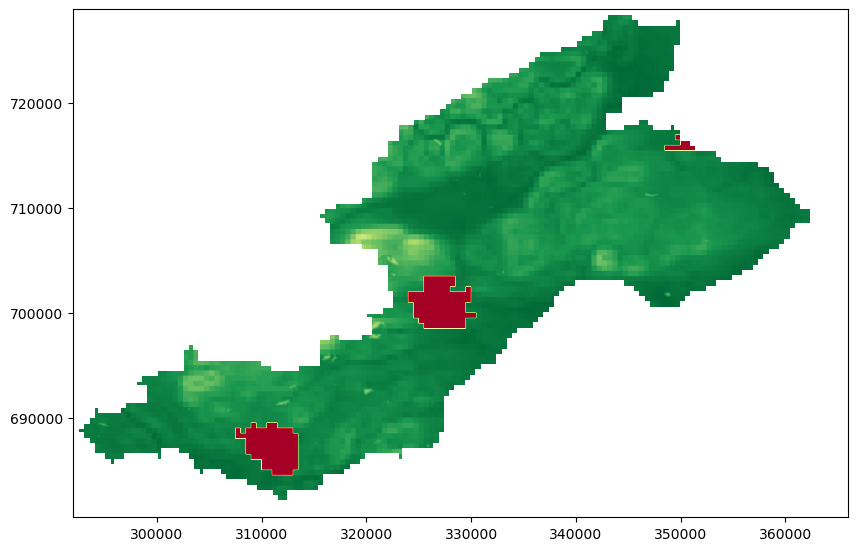

<AxesSubplot: >

In [164]:
Suitablity = rio.open('/arcgis/home/IRP_FINAL/RSsuitability.tif')
print(Suitablity.name)
print(Suitablity.crs)
plot.show(Suitablity,cmap='RdYlGn')

## Discussion

As shown by Figure 11, Fife has a good opportunity to develop a red squirrel strong site, particulary within areas around Lady Bank, Tayport and Kincardine.

As discussued, the red squirrel populations within Fife are at risk due to there also being a grey squirrel population. Therefore this map helps indicate the most suitable areas to develop a red squirrel stronghold site, which helps prevent the population becoming diminished, through conservation and protection. 

However, this map could be improved by considering wider factors that could impact a red squirrel stronghold site. Factors such as climate change impacts as well as conflicting needs for land use. Although these limiations could be a potential future research project, which indicates high risk areas of climate change to assess where best to implement protective measures for red squirrels as well as other species. Additionally the criteria weights may not be the most effective, altering the results of most suitable areas for red squirrel stronghold sites. 

## Conclusion

This project aimed to identify where within Fife a potential red squirrel stronghold site be developed. Using QGIS to create a multiple critiera evaluation map, and using python to visualise the results as well as calculate the weights, this was achieved. The areas most suitable to develop a red squirrel stronghold site as indicated by the map, were areas surrounding Lady Bank, Kincardine and Tayport. This map  helps contribute to the protection and conservation of the red squirrel population, which is highly important as the population has significantly decreased and continues to do so, which negatively impacts levels of woodland regeneration.

## Appendix
Installing necessary libraries

In [ ]:
pip install pandas

In [5]:
import pandas as pd

In [ ]:
pip install numpy

In [ ]:
import numpy as np

In [ ]:
pip install seaborn

In [9]:
import seaborn as sns

In [ ]:
pip install geopandas 

In [11]:
import geopandas as gpd

In [ ]:
pip install contextily

In [13]:
import contextily

In [ ]:
pip install mapclassify

In [15]:
import mapclassify

In [ ]:
pip install fiona

In [17]:
import fiona

In [ ]:
pip install shapely

In [19]:
import shapely

In [ ]:
pip install rtree

In [21]:
import rtree

In [ ]:
pip install folium

In [23]:
import folium

In [ ]:
pip install matplotlib

In [25]:
import matplotlib

In [ ]:
pip install matplotlib.pyplot

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install earthpy rasterio

In [ ]:
pip install earthpy 

In [30]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [ ]:
pip install  rasterio

In [32]:
import rasterio as rio
from rasterio import plot

## References

@DATA{EEA2022,
  author = {European Environment Agency},
  year = {2023},
  title = {HLMC EUNIS LEVEL 1},
  URL = {https://www.eea.europa.eu/en/datahub?size=n_10_n&filters%5B0%5D%5Bfield%5D=issued.date&filters%5B0%5D%5Btype%5D=any&filters%5B0%5D%5Bvalues%5D%5B0%5D=All%20time},
}

@DATA{EIDC2023,
  author = {Environmental Information Data Centre},
  year = {2023},
  title = {Land Cover Map 2023},
  URL = {https://eidc.ac.uk/}

@article{FC2024
title = "Conserving Scotland's red squirrels",
author = "Scottish Forestry",
year = "2024"}


@DATA{GG3209
title = "GG3209 - Spatial Analysis with GIS", "University of St Andrews",
year = "2024"}


@DATA{HABMOS2022,
  author = {Scotland's Environment Data Hub },
  year = {2023},
  title = {HabMoS EUNIS Land Cover Scotland},
  URL = {https://catalogue.ceh.ac.uk/documents/73ecb85e-c55a-4505-9c39-526b464e1efd}}


@DATA{LCM2022,
  author = {Nature Scot},
  year = {2023},
  title = {Land Character Assessment Map 2023},
  URL = {https://opendata.nature.scot/datasets/snh::landscape-character-assessment/explore}


@article{Rahman01122008},
author = {R. Rahman and S. K. Saha},
title = {Remote sensing, spatial multi criteria evaluation (SMCE) and analytical hierarchy process (AHP) in optimal cropping pattern planning for a flood prone area},
journal = {Journal of Spatial Science},
volume = {53},
number = {2},
pages = {161--177},
year = {2008},
publisher = {Taylor \& Francis},
doi = {10.1080/14498596.2008.9635156},
URL = { https://doi.org/10.1080/14498596.2008.9635156
},
eprint = {https://doi.org/10.1080/14498596.2008.9635156 
}

@article{SSRS2024
title = "Scotland's Red Squirrels",
author = "SAVING SCOTLAND’S RED SQUIRRELS",
year = "2024"}


@article{SWT2023
title = "Why save the red squirrel?",
author = "Hazel Forrest",
publisher = "Scottish Wildlife Trust",
year = "2023"}


@article{TWT2024
title = "Red Squirrel Habitat Management",
author = "The Wildlife Trusts",
year = "2024"
URL = https://www.wildlifetrusts.org/on-land/habitat-management-red-squirrels}